In [2]:
##pip install yfinance 

In [3]:
import yfinance as yf

In [4]:
from datetime import datetime
end = datetime.now()
start  =  datetime(end.year-20,end.month,end.day)

In [5]:
stock = 'GOOG'
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [8]:
google_data.shape

(5023, 6)

In [10]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5023 entries, 2004-08-19 to 2024-08-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5023 non-null   float64
 1   High       5023 non-null   float64
 2   Low        5023 non-null   float64
 3   Close      5023 non-null   float64
 4   Adj Close  5023 non-null   float64
 5   Volume     5023 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 274.7 KB


In [11]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'closing price of good data ')

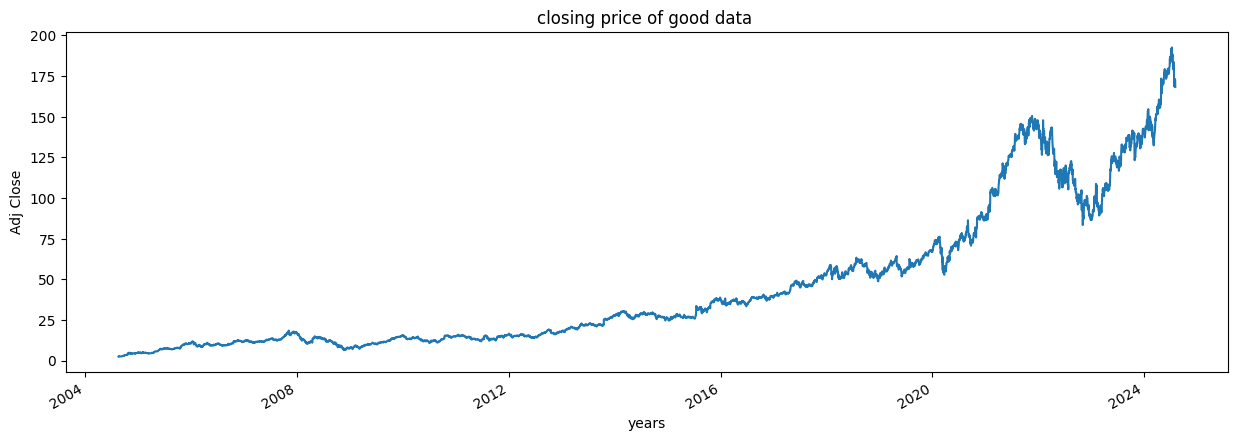

In [14]:
plt.figure(figsize=(15,5))
google_data["Adj Close"].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("closing price of good data ")


In [24]:
def plot_graph(figsize,values, column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of good data ")


In [25]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

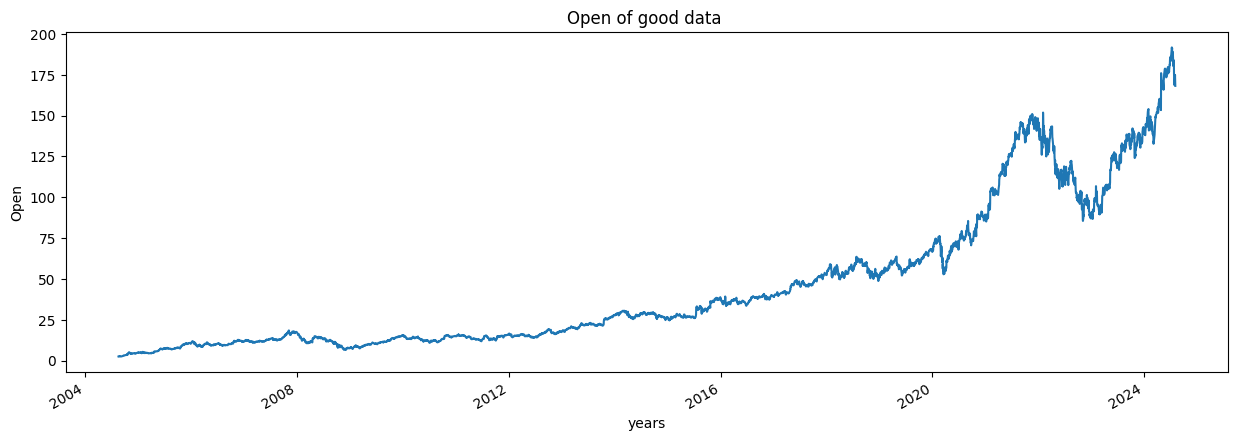

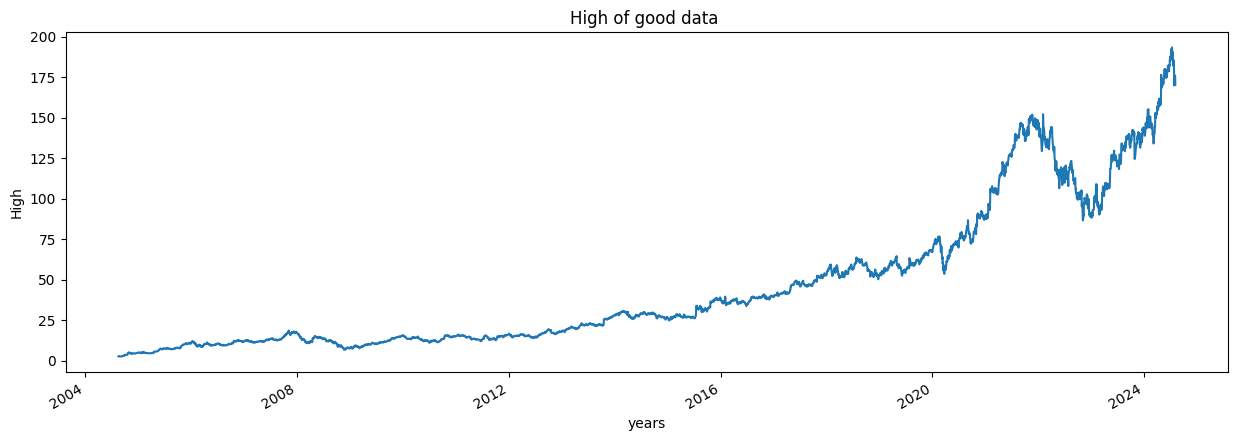

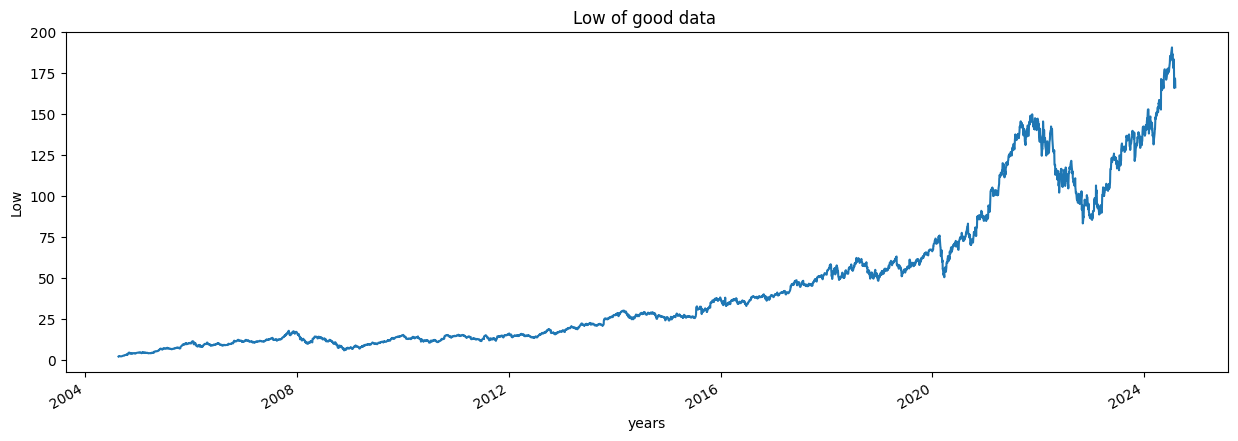

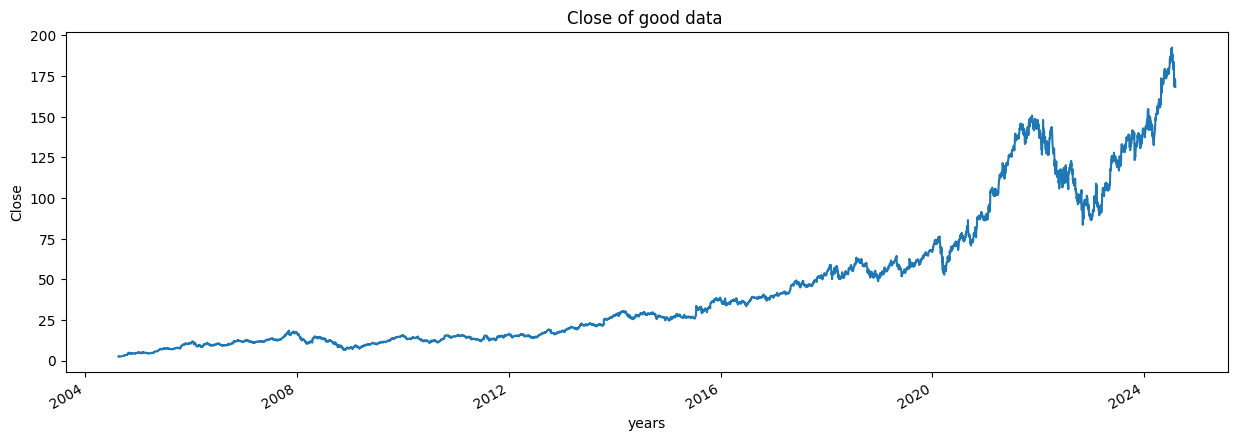

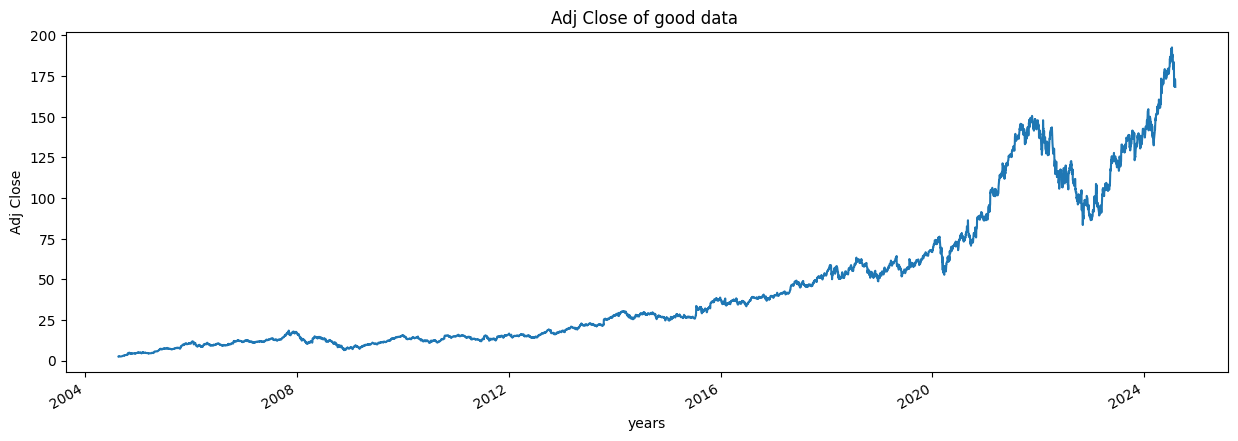

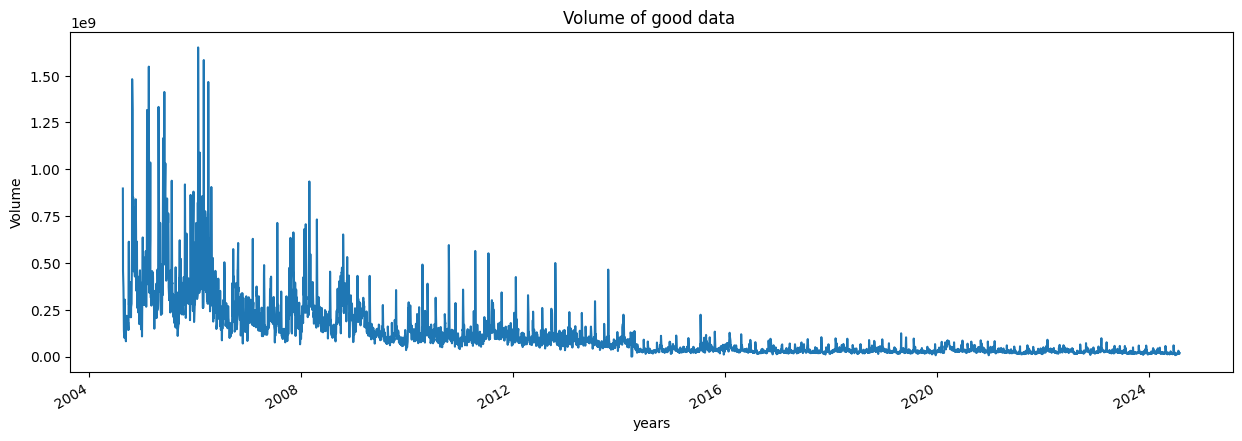

In [26]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

In [27]:
#caluculating moving avarage 

In [36]:
import pandas as pd
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [38]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [48]:
#now allying the moving average concept in dataset

In [49]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 148


In [50]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [51]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.028317
Name: MA_for_250_days, dtype: float64

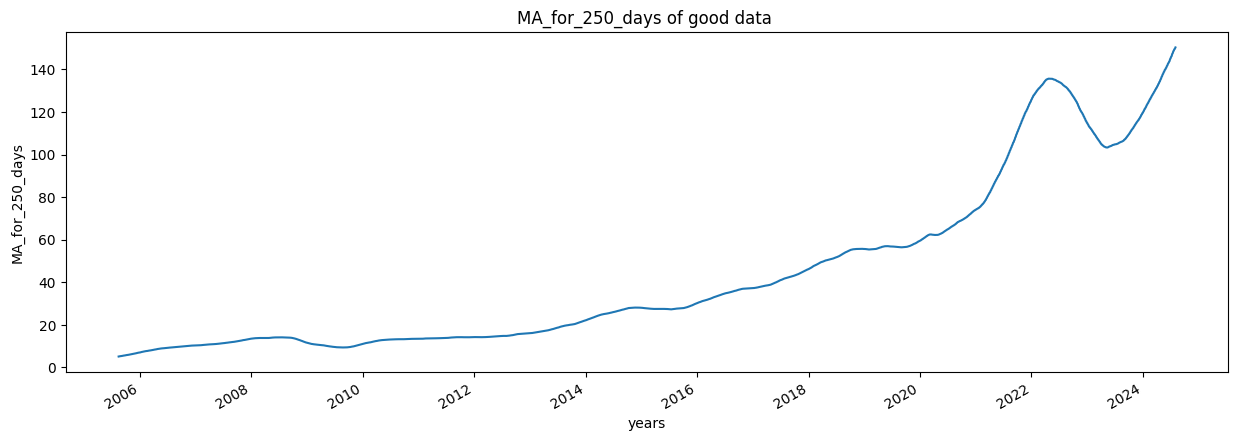

In [53]:
plot_graph((15,5),google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

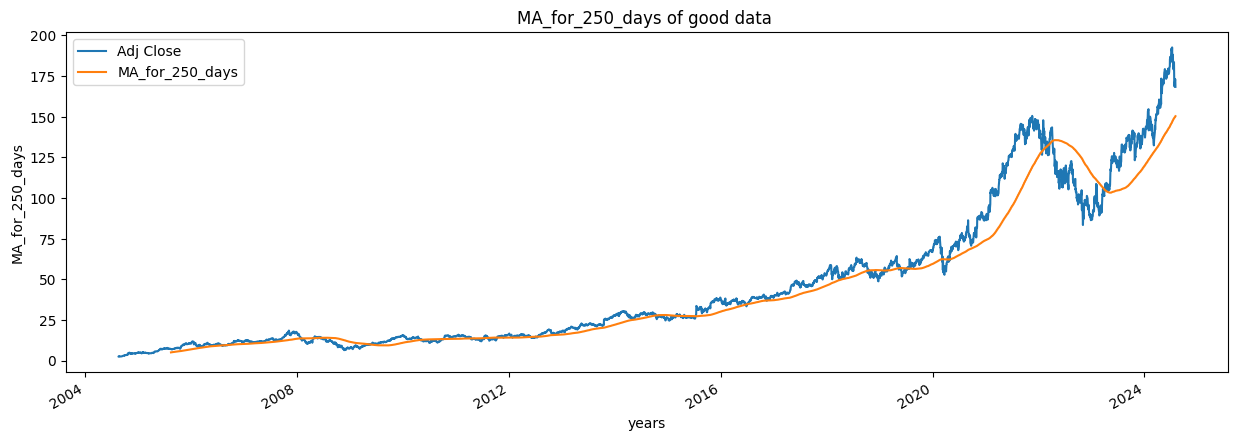

In [54]:
plot_graph((15,5),google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

In [55]:
#percentage change

In [56]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.496292,NaN
2004-08-20,2.694573,0.079430
2004-08-23,2.721690,0.010064
2004-08-24,2.608991,-0.041408
2004-08-25,2.637103,0.010775


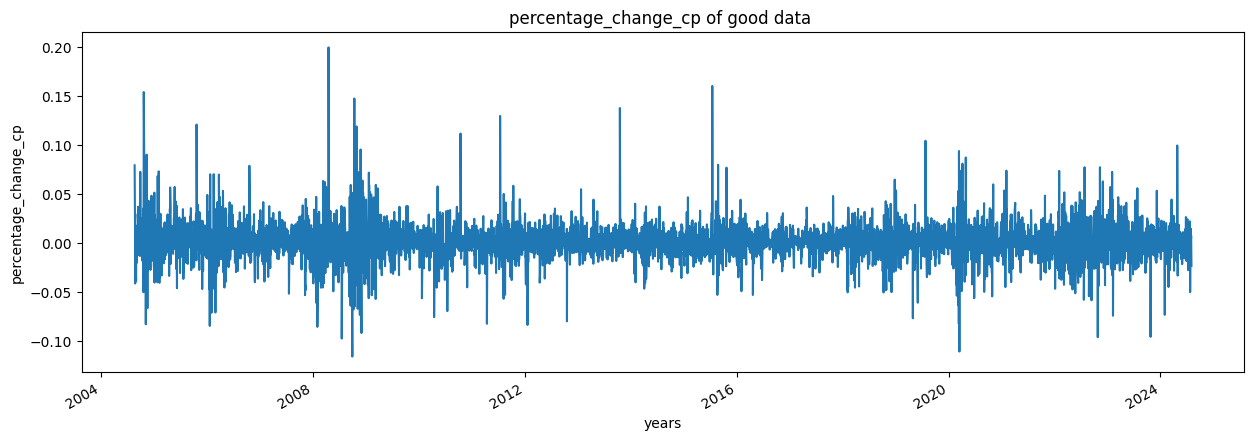

In [57]:
plot_graph((15,5),google_data['percentage_change_cp'], 'percentage_change_cp')

In [58]:
#preprocess the data

In [65]:
Adj_Close_price = google_data[['Adj Close']]

In [66]:
max(Adj_Close_price.values),min(Adj_Close_price.values)

(array([192.66000366]), array([2.48808169]))

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_Close_price)
scaled_data

array([[4.31749279e-05],
       [1.08581220e-03],
       [1.22840556e-03],
       ...,
       [8.97408568e-01],
       [8.93727704e-01],
       [8.72431169e-01]])

In [70]:
len(scaled_data)

5023

In [71]:
x_data = []
y_data = []
for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
import numpy as np
x_data,y_data = np.array(x_data),np.array(y_data)

In [72]:
x_data[0],y_data[0]

(array([[4.31749279e-05],
        [1.08581220e-03],
        [1.22840556e-03],
        [6.35788989e-04],
        [7.83614035e-04],
        [1.03348276e-03],
        [8.03236951e-04],
        [2.61643473e-04],
        [3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.3

In [76]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[:splitting_len]
y_test = y_data[:splitting_len]

In [78]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3446, 100, 1)
(3446, 1)
(3446, 100, 1)
(3446, 1)


In [86]:
#pip install keras
#!pip install tensorflow

In [93]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [96]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64,return_sequences = False))
model.add(Dense(25))
model.add(Dense((1)))

In [98]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [99]:
model.fit(x_train,y_train,batch_size = 1, epochs = 2)

Epoch 1/2
3446/3446 ━━━━━━━━━━━━━━━━━━━━ 291s 81ms/step - loss: 2.9277e-04
Epoch 2/2
3446/3446 ━━━━━━━━━━━━━━━━━━━━ 159s 46ms/step - loss: 6.1315e-05


In [100]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [101]:
prediction = model.predict(x_test)

108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step


In [104]:
prediction

array([[0.02062511],
       [0.02071401],
       [0.02084817],
       ...,
       [0.29848295],
       [0.29882327],
       [0.29667723]], dtype=float32)

In [105]:
#inverse transform to get original data

In [130]:
inv_pred = scaler.inverse_transform(prediction)
inv_pred

array([[ 6.4103994],
       [ 6.4273057],
       [ 6.452819 ],
       ...,
       [59.25116  ],
       [59.31588  ],
       [58.907764 ]], dtype=float32)

In [131]:
inv_y_test =  scaler.inverse_transform(y_test)
inv_y_test

array([[ 4.81495285],
       [ 4.86072874],
       [ 4.85948515],
       ...,
       [58.55986023],
       [57.73680115],
       [57.99500656]])

In [132]:
rmse=np.sqrt(np.mean((inv_pred-inv_y_test)**2))

In [133]:
rmse

1.2165926874982556

In [134]:
ploting_data = pd.DataFrame(
    {
        'original_test_data':inv_y_test.reshape(-1),
        'prediction':inv_pred.reshape(-1)
    } 
)
ploting_data.head()

,original_test_data,prediction
0,4.814953,6.410399
1,4.860729,6.427306
2,4.859485,6.452819
3,4.974921,6.468536
4,5.072692,6.524491


<Figure size 640x480 with 0 Axes>

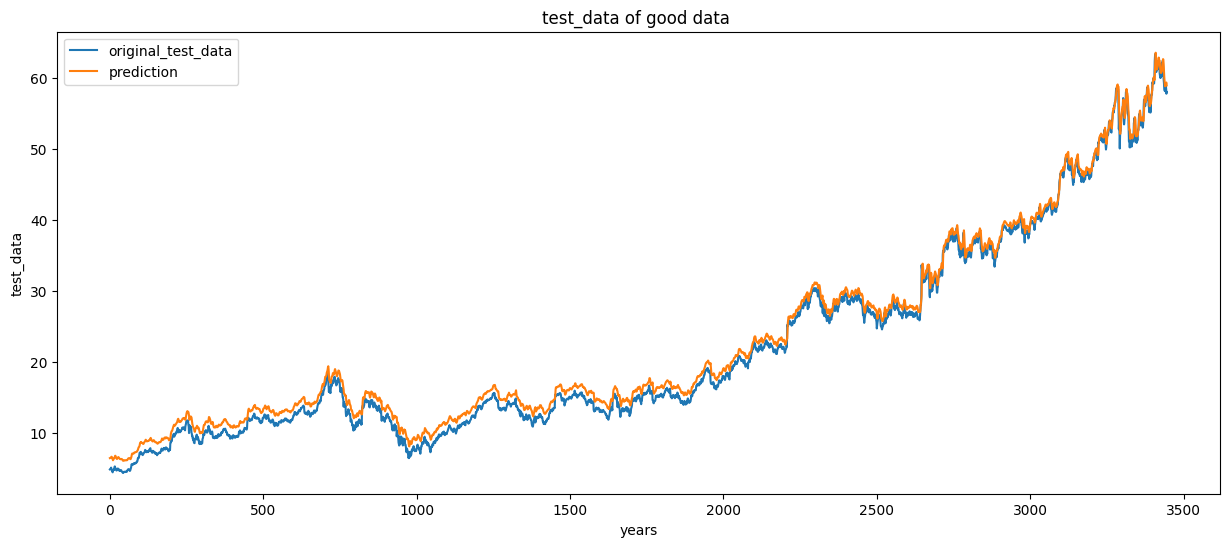

In [135]:
plot_graph((15,6), ploting_data, 'test_data')

In [136]:
model.save("Latest_stock_price_model.keras")